# Drug Consumption Final Project for COMP 562 - Logistic Regression
 ### by Tarini Ramesh

## Import Libraries and Data

In [47]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

drug_labels = ['Alcohol','Amphet','Amyl','Benzos','Caff','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','VSA']
sched_1 = ['Heroin','LSD','Ecstasy','Mushrooms']
sched_2 = ['Amphet','Coke','Crack','Meth']
sched_3 = ['Ketamine']
sched_4 = ['Benzos']
not_controlled_substance = ['Alcohol','Amyl','Caff','Choc','Legalh','Nicotine','VSA']
schedules = ['Sch1','Sch2','Sch3','Sch4', 'SchNA']
personality_labels = ['Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']
demographic_labels = ['Age','Gender','Education','Country','Ethnicity']
target_label = ['Cannabis']

In [48]:
drugs = pd.read_csv('drugs.txt')
print(drugs.shape)
drugs.head()

(1877, 35)


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,LSD,Meth,Mushrooms,Nicotine,VSA,Sch1,Sch2,Sch3,Sch4,SchNA
0,35-44,1,Professional certificate/ diploma,UK,Mixed-White/Asian,39.0,36.0,42.0,37.0,42.0,...,0,0,0,1,0,0,1,0,1,1
1,25-34,0,Doctorate degree,UK,White,29.0,52.0,55.0,48.0,41.0,...,1,1,0,1,0,1,1,1,0,1
2,35-44,0,Professional certificate/ diploma,UK,White,31.0,45.0,40.0,32.0,34.0,...,0,0,1,0,0,1,0,0,0,1
3,18-24,1,Masters degree,UK,White,34.0,34.0,46.0,47.0,46.0,...,0,0,0,1,0,0,1,1,1,1
4,35-44,1,Doctorate degree,UK,White,43.0,28.0,43.0,41.0,50.0,...,0,0,1,1,0,1,1,0,0,1


## Logistic Regression

### Multiclass

C:\Users\tramesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


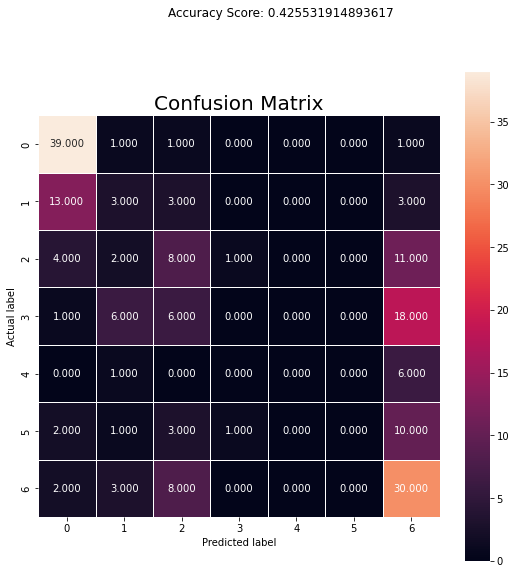

In [49]:
drugsC = pd.read_csv('SVMdrugs.txt')
X = drugsC.drop(target_label, 1)
y = drugsC['Cannabis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
clf = LogisticRegression(multi_class='multinomial', random_state=0).fit(X_train, y_train)

#print(clf.predict(X_test))
#print(clf.predict_proba(X_test))
#print("Accuracy:", clf.score(X_test, y_test))

plt.figure(figsize=(9,9))
sns.heatmap(metrics.confusion_matrix(y_test, clf.predict(X_test)), annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 20);
plt.suptitle('Accuracy Score: {0}'.format(clf.score(X_test, y_test), size = 15));

### Binary

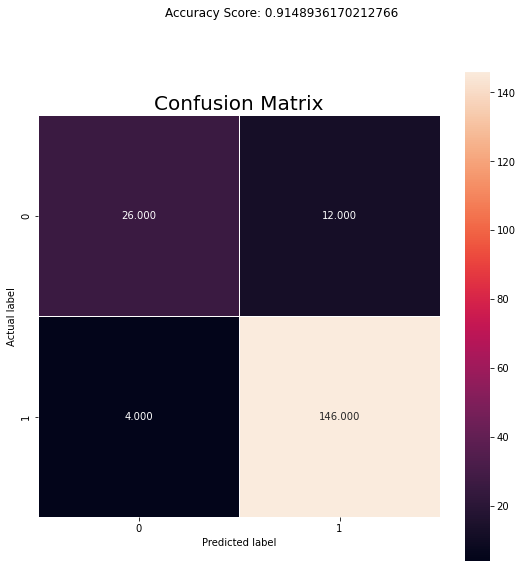

In [50]:
drugsC = pd.read_csv('SVMdrugs.txt')
X = drugsC.drop(target_label, 1)
y = drugsC['Cannabis']
y = np.where((y == 'CL0'), 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

#print(clf.predict(X_test))
#print(clf.predict_proba(X_test))
#print("Accuracy:", clf.score(X_test, y_test))

plt.figure(figsize=(9,9))
sns.heatmap(metrics.confusion_matrix(y_test, clf.predict(X_test)), annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 20);
plt.suptitle('Accuracy Score: {0}'.format(clf.score(X_test, y_test), size = 15));

## Sources

In [51]:
"https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"
"https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a"

'https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a'